In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


# 1.Loading the Data

In [3]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# 2. Exploring the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.shape

(200, 5)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
#To rename the column 'Unnamed: 0' to 'Index'
df.rename(columns={"Unnamed: 0":"Index"},inplace=True)

# 3.Data Visualization

# 1. Correlation

In [15]:
df.corr()

,Index,TV,Radio,Newspaper,Sales
Index,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


# 2.Linear regression plots

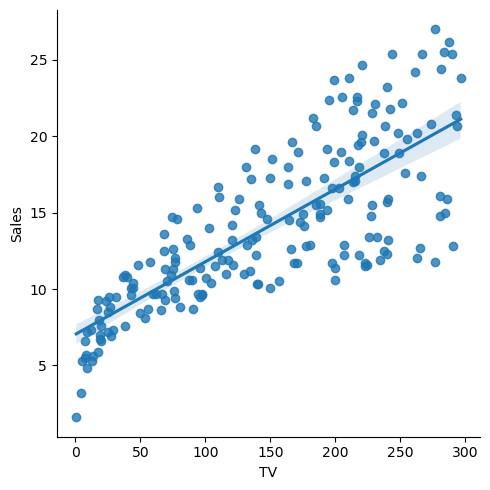

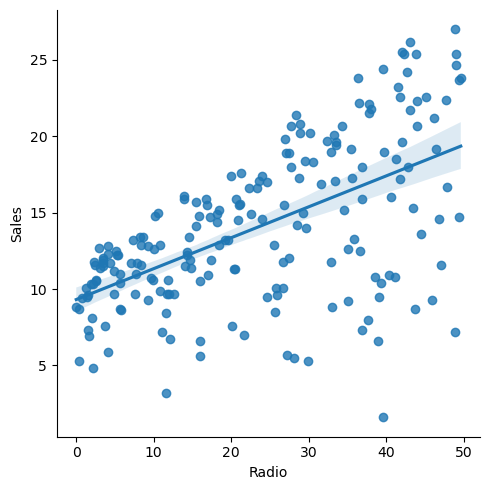

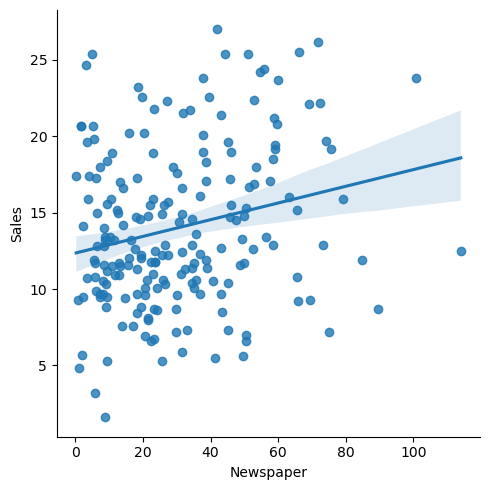

In [16]:
# To visualize the relationship between each independent variable and the dependent variable

sns.lmplot(x='TV', y='Sales', data=df)
sns.lmplot(x='Radio', y='Sales', data=df)
sns.lmplot(x='Newspaper',y= 'Sales', data=df)

# 3.Box Plot

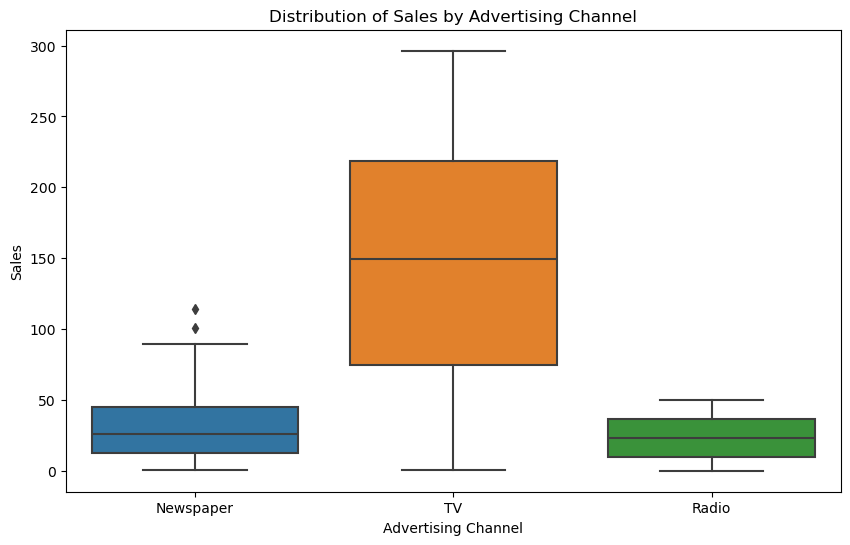

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(df[['Newspaper','TV','Radio']])
plt.title("Distribution of Sales by Advertising Channel")
plt.xlabel("Advertising Channel")
plt.ylabel("Sales")
plt.show()

In [24]:
df.columns

Index(['Index', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


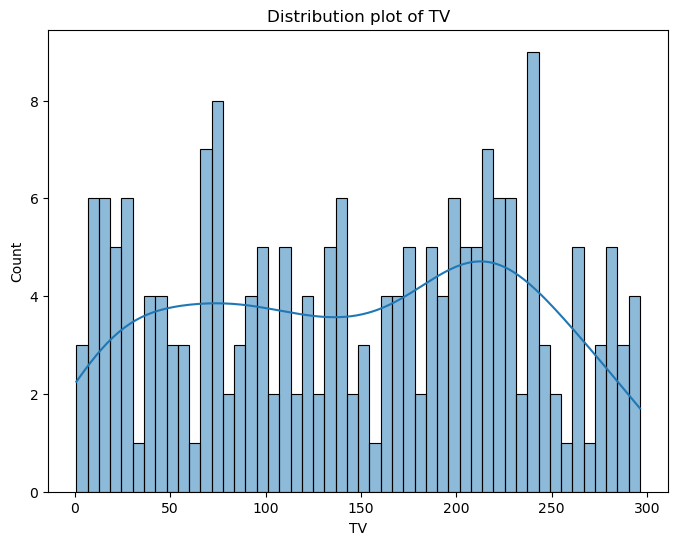

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


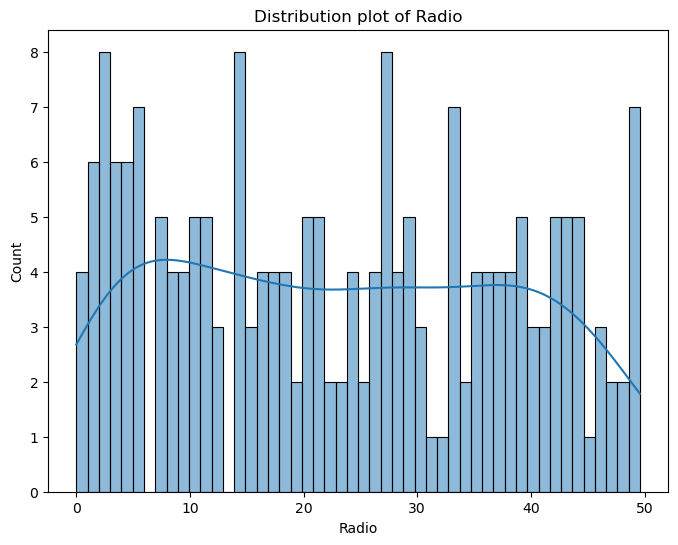

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


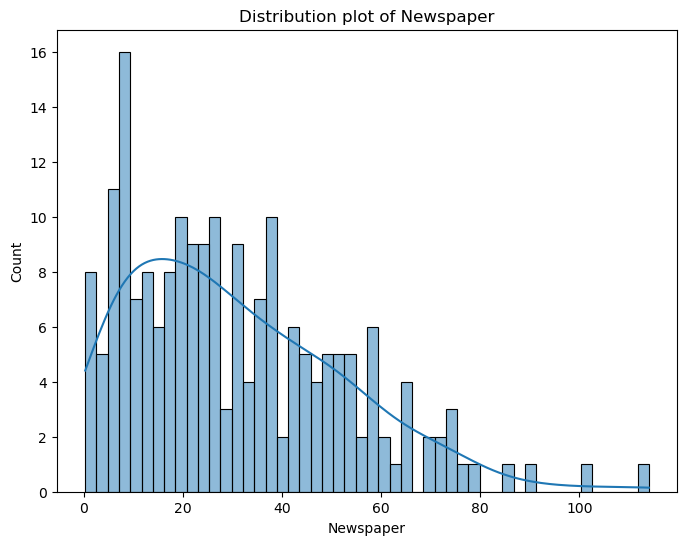

In [26]:
col = ['TV', 'Radio', 'Newspaper']
for i in col:
    plt.figure(figsize=(8, 6))  
    sns.histplot(data=df, x=i, kde=True, bins=50)
    plt.title(f'Distribution plot of {i}')
    plt.xlabel(i)
    plt.show()  

# 4.Machine Learning Model

In [39]:
# Defining the X and y
x=df.drop(columns=['Sales'], axis=1)
x=df.drop(columns=["Index"],axis=1)
y=df['Sales']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [40]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)



LinearRegression()

In [42]:
y_pred = model.predict(X_test)

In [51]:
# Calculate the Mean Squared Error and R-squared value
train_score=model.score(X_train,y_train)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Training score:{train_score}")

Mean Squared Error: 1.8794611066890606e-29
R-squared: 1.0
Training score:1.0


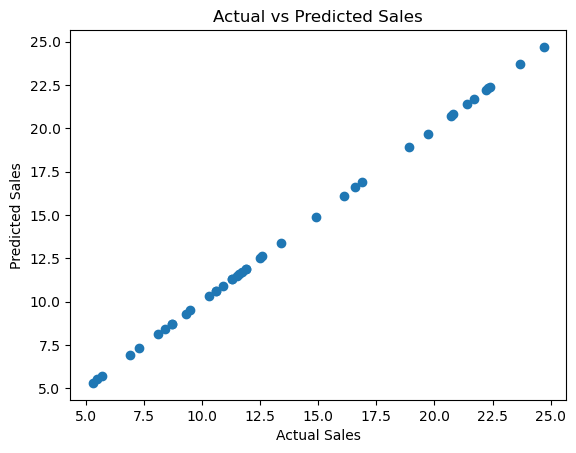

In [44]:
# Plot the actual vs predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()
